### Deep *autoencoders*
1- import data


In [1]:
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
data = pd.read_csv('creditcard.csv', header = 0, sep=',')

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:

data['Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
df0=data.query('Class ==0').sample(50000)
df1=data.query('Class ==1').sample(492)

## Choose a sample of the data

In [9]:
df= pd.concat([df0,df1])

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223102,143246.0,-1.377305,-0.372117,-0.154698,-4.066555,1.450543,3.670849,-1.195670,1.424172,-2.164784,...,-0.143067,-0.187123,-0.109871,0.670254,0.738912,-0.114791,-0.097716,0.074405,-0.329241,0
176278,122699.0,1.581761,-2.076479,-0.501187,-0.699166,-1.513057,0.116572,-1.071263,0.037773,0.423756,...,0.415065,0.546610,-0.001968,0.497900,-0.501959,-0.280257,-0.021973,0.021742,0.888176,0
219358,141701.0,-0.845522,1.160832,-0.365703,-0.787897,0.220464,-0.609455,0.415506,0.328382,-0.002153,...,-0.137167,-0.593041,0.177873,-0.437652,-0.534062,0.104237,-0.423910,0.017607,-0.345313,0
113480,73081.0,1.400753,-0.671381,-1.135535,-1.684530,1.370274,3.245265,-1.305561,0.867589,-0.756761,...,-0.010801,-0.302947,-0.005467,0.922710,0.414834,-0.320571,0.037034,0.043658,-0.240523,0
252812,155978.0,-1.090092,1.443596,-0.241436,-0.307317,1.003411,-0.554078,1.238035,0.041121,-0.298852,...,0.189616,0.336668,-0.432263,-0.533731,0.358424,-0.669834,-0.753871,-0.175870,-0.349231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124087,77171.0,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,-0.038339,...,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,-0.349231,1
11343,19762.0,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.349231,1
150680,93879.0,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,...,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,0.062692,1
190368,128803.0,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,...,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,0.350034,1


**Doing PCA to observe the Fraud as anamolies**

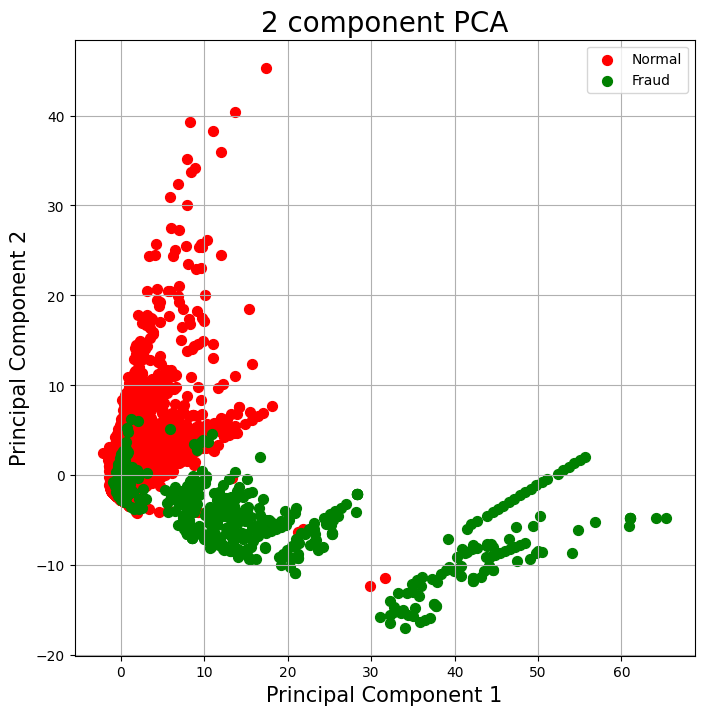

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
y=df['Class']
principalComponents = pca.fit_transform(df.drop(labels=['Time',"Class"],axis=1).values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Class']=list(y)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal','Fraud'])
ax.grid()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# Your data frame (df) and other necessary variables

# PCA with 3 components
pca = PCA(n_components=3)
y = df['Class']
principalComponents = pca.fit_transform(df.drop(labels=['Time', 'Class'], axis=1).values)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])
principalDf['Class'] = list(y)

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3', color='Class')

# Update layout and display the plot
fig.update_layout(title='3 Component PCA')
fig.show()


**we can say that the frauds or anomalies are those that are close to the first components because they do not follow the same trend as the other points**

# building the model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['Time'],axis=1),
                                                    df['Class'],test_size=0.2, random_state=42)

In [13]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
137061,-1.789123,0.941366,1.432897,-1.318458,-0.450124,-1.290731,0.933642,-0.306360,0.917978,0.722699,...,-0.292198,-0.202022,-0.017159,0.740137,-0.183085,0.692176,0.488185,0.418299,-0.073363,0
172103,-0.088659,0.823567,-1.152120,-0.233639,0.224291,-0.800400,0.560724,0.412665,-0.097077,-0.979676,...,0.369217,0.805276,-0.037934,-0.638054,-0.374549,-0.136096,-0.044447,0.022277,-0.091155,0
104259,1.320000,0.329500,0.191057,0.410554,0.053748,-0.479545,0.139986,-0.232104,-0.111089,-0.106000,...,-0.296237,-0.783407,0.015735,-0.422142,0.377008,0.141847,-0.020971,0.013578,-0.345313,0
33979,-0.663539,1.178152,1.372977,1.584939,1.403812,-0.160920,1.669495,-0.883076,-1.195220,1.559498,...,-0.041300,0.304237,-0.233819,0.022322,0.250182,-0.095770,-0.995793,-0.683392,-0.343954,0
165567,1.793325,0.541743,-2.051483,3.137201,2.635570,4.349049,-1.171793,1.275964,-0.478338,0.095935,...,-0.142407,-0.468062,0.328774,0.371455,-0.494426,-0.172272,0.085872,0.043433,-0.296976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155917,-0.498803,0.530138,0.913576,-1.257295,2.606292,4.208804,-0.072475,0.839405,1.356385,-1.130185,...,-0.308892,-0.561020,-0.249280,0.596593,0.303888,-0.707301,-0.062793,-0.152265,-0.308171,0
134631,1.316940,-1.216058,0.160492,-1.329103,-1.369483,-0.723096,-0.700067,-0.124343,-1.910614,1.376188,...,-0.578927,-1.581060,0.258413,-0.046375,-0.055831,-0.617114,0.010665,0.033856,0.046379,0
8629,1.155947,0.598692,0.410679,2.320582,0.554132,0.559264,0.020313,-0.051986,0.185641,0.425753,...,-0.228622,-0.509362,-0.154015,-0.891055,0.522548,-0.091588,-0.037009,0.006885,-0.185949,0
166858,1.747769,0.098540,-1.852568,1.621459,0.404238,-1.270554,0.779976,-0.467764,0.054841,-0.338412,...,-0.088851,-0.355786,0.015024,-0.062023,0.135829,-0.754398,-0.007176,0.002793,0.222495,0


In [18]:
import keras
from keras import optimizers
from keras import backend as k
from keras import losses
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Lambda
from keras.optimizers import RMSprop, Adam, Nadam
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.losses import mse
from keras import regularizers
from tensorflow.keras.layers import Dense, Activation  # Import specific core layers you need

In [19]:
encoding_dim=12
input_dim= x_train.shape[1]-1
hidden_dim1 = 10
hidden_dim2 = 6
InputArray= Input(shape=(input_dim,))
encoder = Dense(encoding_dim,activity_regularizer=regularizers.l1(10e-5),activation='tanh')(InputArray)
encoder = Dense(hidden_dim1, activation="elu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
decoder = Dense(hidden_dim2, activation='elu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim,activation='elu')(decoder)
autoencoder=Model(InputArray,decoder)

In [21]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 12)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 10)                70        
                                                                 
 dense_5 (Dense)             (None, 29)                319   

In [23]:
autoencoder.compile(optimizer=RMSprop(),
                    loss='mean_squared_error',
                    metrics=['mae','accuracy'])

In [ ]:
history = autoencoder.fit(x_train[x_train['Class']==0].drop(labels=['Class'],axis=1),x_train[x_train['Class']==0].drop(labels=['Class'],axis=1),
                          batch_size=32,
                          epochs=32,
                          verbose=1,
                          shuffle= True,validation_data=None,
                          callbacks=[TensorBoard(log_dir='../logs/autoencoder1')])

Epoch 1/32
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8149 - mae: 0.5559 - accuracy: 0.4599
Epoch 2/32
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7201 - mae: 0.5140 - accuracy: 0.5442
Epoch 3/32
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6891 - mae: 0.5009 - accuracy: 0.5618
Epoch 4/32
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6712 - mae: 0.4937 - accuracy: 0.5744
Epoch 5/32
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6594 - mae: 0.4883 - accuracy: 0.5828
Epoch 6/32
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6426 - mae: 0.4805 - accuracy: 0.5870
Epoch 7/32
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6249 - mae: 0.4720 - accuracy: 0.5981
Epoch 8/32
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6160 - mae: 0.4680 - accuracy: 0.6077
Epoch 9/32
1250/1250 [==============================] - 4s 3ms/step - lo

In [ ]:
import numpy as np
threshold = np.linalg.norm(x_train[x_train['Class']==0].drop(labels=['Class'],axis=1)-autoencoder.predict(x_train[x_train['Class']==0].drop(labels=['Class'],axis=1)), axis=-1)

1250/1250 [==============================] - 2s 1ms/step


In [ ]:
autoencoder.predict(x_train[x_train['Class']==0].drop(labels=['Class'],axis=1)).shape

1250/1250 [==============================] - 2s 1ms/step


(39989, 29)

In [ ]:
X_test=pd.concat([x_test,x_train[x_train['Class']==1]])
y_pred= autoencoder.predict(X_test.drop(labels=['Class'],axis=1))
y_dist = np.linalg.norm(X_test.drop(labels=['Class'],axis=1)-y_pred, axis=-1)
X_test

329/329 [==============================] - 2s 6ms/step


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
231141,-1.549535,1.113173,-0.565300,-2.678353,0.603026,-0.751120,0.497445,0.751185,-0.423648,-1.407521,...,-0.197676,-0.823274,-0.071255,-1.080126,0.092096,0.411905,-0.121789,-0.065636,-0.349231,0
79896,1.257414,0.565977,-0.694750,0.683582,0.292981,-0.953134,0.271526,-0.125339,-0.339000,-0.530669,...,-0.129079,-0.369868,-0.131881,-0.125943,0.570603,0.373563,-0.037745,0.028395,-0.350191,0
88226,-0.534402,1.040452,2.794049,2.476232,-0.596967,0.662110,-0.080138,0.246809,-0.873613,0.482684,...,0.426032,1.281417,-0.033007,0.432257,-0.711422,0.167431,0.097991,0.170850,-0.216775,0
267817,2.087978,0.045404,-1.379230,0.148097,0.096206,-1.404411,0.445940,-0.481142,0.517283,-0.138709,...,-0.132301,-0.142363,0.181249,0.085677,0.064144,-0.083960,-0.043025,-0.061147,-0.353229,0
244940,-0.062028,0.913199,-1.047768,-0.214290,0.241072,-0.918998,0.507371,0.391584,-0.147832,-0.969122,...,0.369838,0.862188,-0.075964,-0.469764,-0.393814,-0.146159,-0.034206,0.022906,-0.182071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12070,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,-13.002709,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.349231,1
102782,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,0.543187,...,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,-0.274907,1
124036,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,...,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,0.162524,1
43681,-18.247513,8.713250,-17.880127,9.249459,-14.541213,-1.911564,-18.014660,5.522162,-9.283925,-14.557159,...,0.598843,0.615319,-0.486499,0.739268,-0.236845,-0.046082,-3.011473,-1.022147,-0.137533,1


In [ ]:
'''
#y_pred = autoencoder.predict(x_test.drop(labels=['Class'],axis=1))
y_dist = np.linalg.norm(x_test.drop(labels=['Class'],axis=1)-y_pred, axis=-1)
z=zip(y_dist > np.mean(threshold), y_pred)
y_label = []
error = []
for idx , (is_anomay, y_pred) in enumerate(z):
  if is_anomay:
    y_label.append(1)
  else:
    y_label.append(0)
  error.append(y_dist)'''

In [ ]:
import numpy as np
X_test=pd.concat([x_test,x_train[x_train['Class']==1]])
y_pred= autoencoder.predict(X_test.drop(labels=['Class'],axis=1))
y_dist = np.linalg.norm(X_test.drop(labels=['Class'],axis=1)-y_pred, axis=-1)
y_label = [0 for i in range(len(y_dist))]
for i in range(len(y_dist)):
    if y_dist[i]> 8.8:
    y_label[i]=1
    else:
    y_label[i]=0

In [ ]:
np.mean(threshold)

3.2675768787774677

In [ ]:
y_pred

array([[-9.7773468e-01,  1.1921716e+00, -3.0171454e-01, ...,
        -1.5928864e-02,  2.5191322e-02, -4.3123722e-01],
       [ 9.7328234e-01, -1.2099266e-01, -4.8160869e-01, ...,
         2.2794306e-04,  3.1289533e-03,  4.0559769e-03],
       [-9.8436469e-01,  9.3937761e-01,  2.5811031e+00, ...,
         3.6304031e-02,  3.7496537e-02, -4.0784341e-01],
       ...,
       [-9.7423112e-01, -3.2426614e-01,  1.3913486e+00, ...,
        -1.3419986e-03,  5.4564588e-02,  4.8695341e-01],
       [-9.2280918e-01, -9.7833383e-01, -9.6585917e-01, ...,
        -3.5304308e-02,  6.4244077e-02,  3.2019191e+00],
       [-7.3248672e-01, -9.9986649e-01, -8.9598376e-01, ...,
        -8.0871105e-02,  2.3634464e-02,  4.4269962e+00]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(X_test['Class'], y_label)

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9816  195]
 [  83  409]]


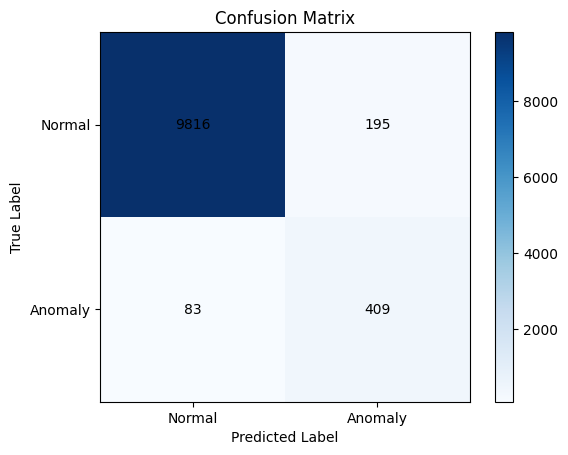

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add number values in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

# Customize the plot
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Normal', 'Anomaly'],
       yticklabels=['Normal', 'Anomaly'],
       xlabel="Predicted Label",
       ylabel="True Label",
       title="Confusion Matrix")

plt.colorbar(im)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(X_test['Class'],y_label))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10011
           1       0.68      0.83      0.75       492

    accuracy                           0.97     10503
   macro avg       0.83      0.91      0.87     10503
weighted avg       0.98      0.97      0.97     10503



## Variationnal Autoencoders

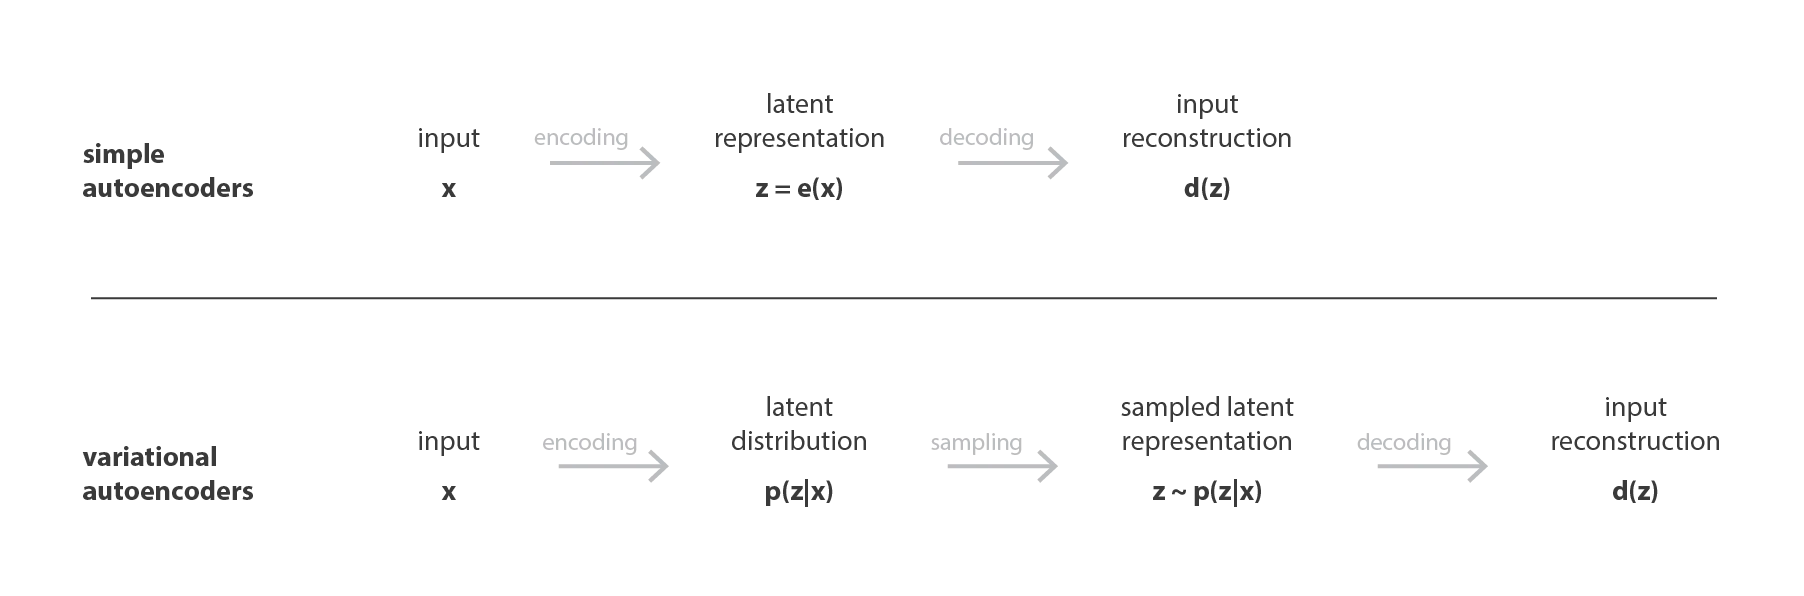

Bayes' theorem:

$ p(z|x) = \frac{{p(x|z) \cdot p(z)}}{{p(x)}} $

In the context of VAEs, this equation can be rearranged as follows:

$p(z|x) = \frac{{p(x|z) \cdot p(z)}}{{\int p(x|u) \cdot p(u) \, du}} $

where:
- $ p(z|x) $ is the posterior distribution, representing the distribution of the latent variables \( z \) given the input data \( x \).
- $ p(x|z) $ is the likelihood function, which models the probability of generating the observed data \( x \) given the latent variables \( z \).
- $ p(z) $ is the prior distribution, representing the prior beliefs about the distribution of the latent variables.
- $ p(x) $ is the marginal likelihood or evidence, which is the probability of observing the data \( x \).

The integral in the denominator of the equation ($ \int p(x|z) \cdot p(z) \, dz $) is a normalization constant that ensures the posterior distribution integrates to 1, as it represents a valid probability distribution.

In VAEs, the goal is to approximate the true posterior distribution $ p(z|x) $ using a variational distribution $ q(z|x) $. This approximation is achieved by optimizing the parameters of the encoder network. The encoder network outputs the parameters of $ q(z|x) $, typically assumed to be a multivariate Gaussian distribution.


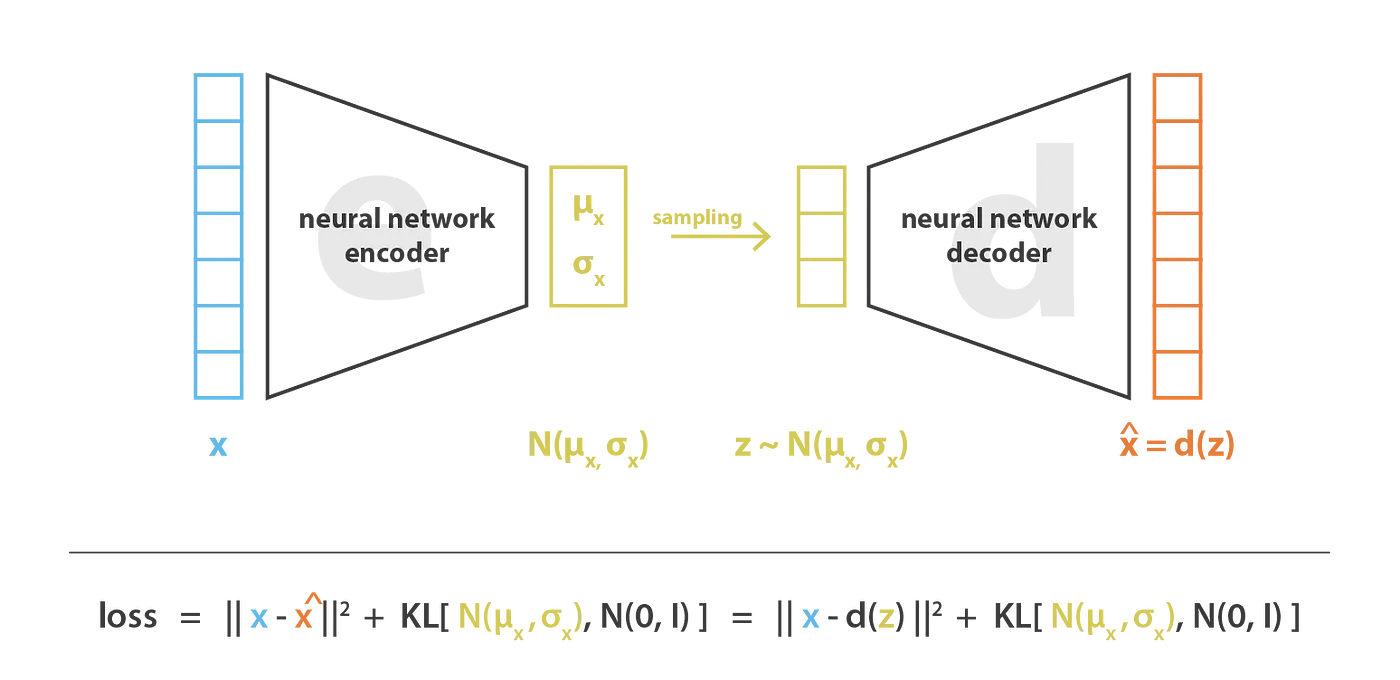

In [90]:
from keras import backend as k

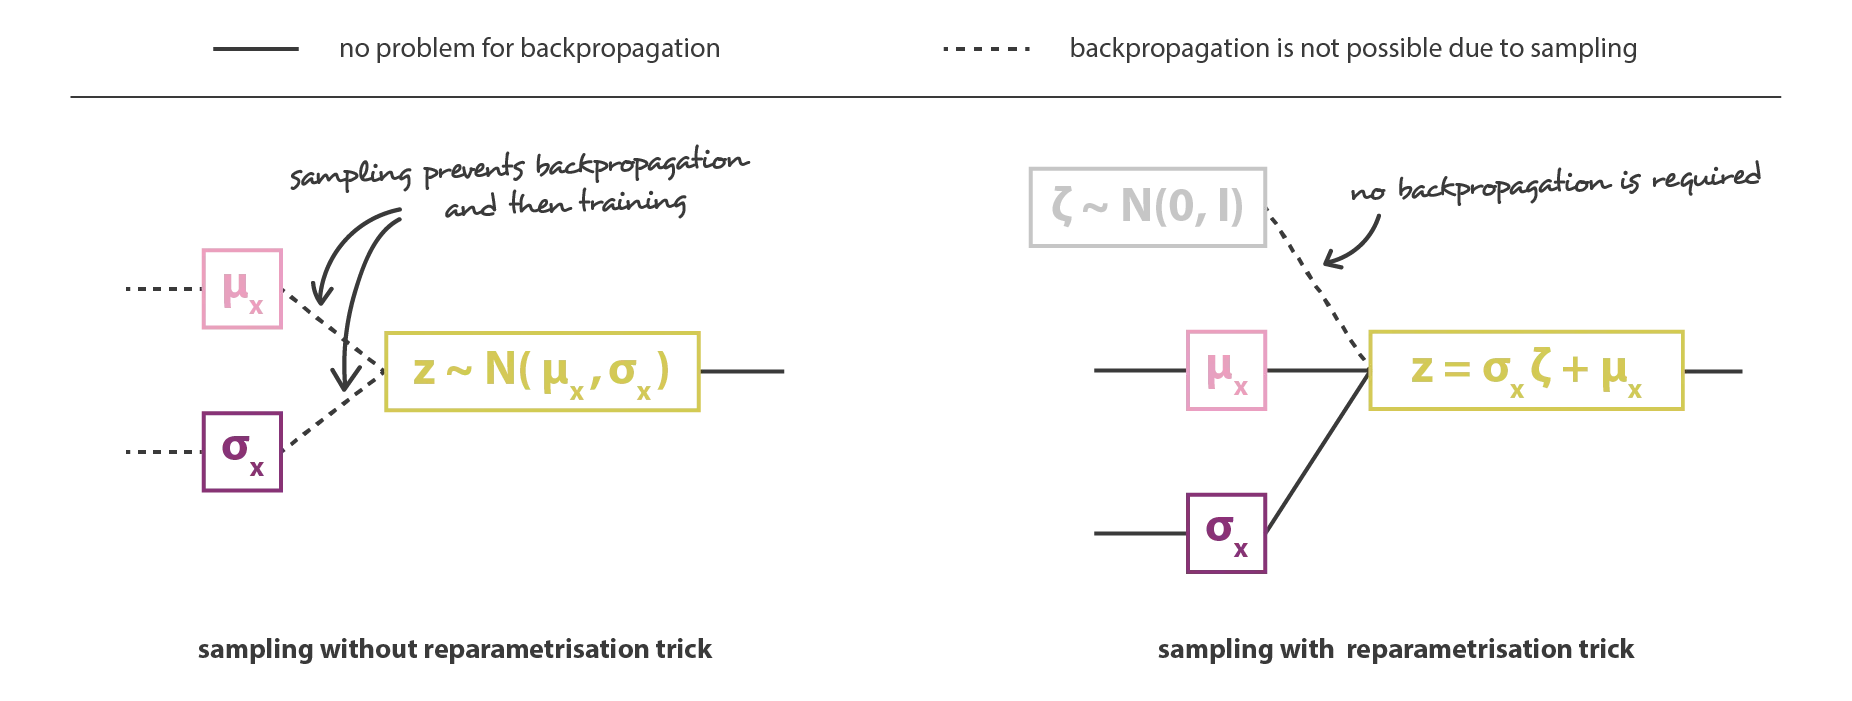

In [91]:
# remparamerterzation trick
# z = z_mean + sqrt(var)*epsilon
def sampling(args):
  z_mean , z_log_var = args
  batch = k.shape(z_mean)[0]
  dim = k.int_shape(z_mean)[1]
  epsilon = k.random_normal(shape = (batch, dim))
  return z_mean + k.exp(0.5 * z_log_var)*epsilon

In [92]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
original_dim = x_train.shape[1]-1
print(original_dim)
input_shape = (original_dim,)
intermediate_dim = 12
batch_size = 32
latent_dim = 2
epochs = 20
# Construction du modèle de l'encodeur
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Échantillonnage
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Création du modèle de l'encodeur
encoder = Model(inputs, [z_mean, z_log_var, z])
encoder.summary()


29
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 29)]                 0         []                            
                                                                                                  
 dense_19 (Dense)            (None, 12)                   360       ['encoder_input[0][0]']       
                                                                                                  
 z_mean (Dense)              (None, 2)                    26        ['dense_19[0][0]']            
                                                                                                  
 z_log_var (Dense)           (None, 2)                    26        ['dense_19[0][0]']            
                                                                                         

In [93]:
from keras.utils import plot_model
plot_model(encoder, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [94]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(6, activation = 'relu')(latent_inputs)

decoder = Dense(12, activation='elu')(x)
decoder = Dense(24, activation='tanh')(decoder)
#decoder = Dense(input_dim,activation='elu')(decoder)



ouputs = Dense(original_dim, activation='sigmoid')(decoder)
decoder = Model(latent_inputs, ouputs, name='decoder')
decoder.summary()



'''decoder = Dense(hidden_dim2, activation='elu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim,activation='elu')(decoder)
autoencoder=Model(InputArray,decoder)'''

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_20 (Dense)            (None, 6)                 18        
                                                                 
 dense_21 (Dense)            (None, 12)                84        
                                                                 
 dense_22 (Dense)            (None, 24)                312       
                                                                 
 dense_23 (Dense)            (None, 29)                725       
                                                                 
Total params: 1139 (4.45 KB)
Trainable params: 1139 (4.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


"decoder = Dense(hidden_dim2, activation='elu')(encoder)\ndecoder = Dense(hidden_dim1, activation='tanh')(decoder)\ndecoder = Dense(input_dim,activation='elu')(decoder)\nautoencoder=Model(InputArray,decoder)"

In [95]:
plot_model(decoder, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Loss function implementation
$
\text{loss} = \lVert x - \hat{x} \rVert + \text{KL}[N(\mu_p, \sigma_p), N(0, I)]
$



$Let : p(x) = \mathcal{N}(\mu_1, \sigma_1) \ and \ q(x) = \mathcal{N}(\mu_2, \sigma_2)
$

$
KL(p, q) = -\int p(x) \log q(x) \, dx + \int p(x) \log p(x) \, dx
$
$
= \frac{1}{2} \log(2\pi\sigma_2^2) +  \frac{\sigma_1^2 +( \mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}(1 + \log(2\pi\sigma_1^2))
$\
$
\\
$
$
= \log(\frac{\sigma_2^2}{\sigma_1^2}) + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}
$
<br>
In multivariate case :
$
KL(p, q)  = \frac{1}{2} \left[ \log \left| \Sigma_q \right| - \log \left| \Sigma_p \right| - k + (\mu_p - \mu_q)^T \Sigma_q^{-1} (\mu_p - \mu_q) + \text{tr} \left\{ \Sigma_q^{-1} \Sigma_p \right\} \right]
$
<br>
For our case we have q is $N(0,I)$ so:
$
KL(p, q) = \frac{1}{2} \left[ \mu_p^T \mu_p + \text{tr}\{\Sigma_p\} - k - \log |\Sigma_p| \right]
$
<br>

finally:

$KL(p, q) = \frac{1}{2} \sum_{i=1}^{k} \left( \mu_{p_i}^2 + \sigma_{p_i}^2 - 1 - \log \sigma_{p_i}^2 \right)$






In [96]:
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = mse(inputs, outputs)
reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - k.square(z_mean) - k.exp(z_log_var)
kl_loss = k.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = k.mean(reconstruction_loss + kl_loss)
'''def vae_loss(inputs, outputs, z_mean, z_log_var, original_dim):
    reconstruction_loss = k.mean(k.square(inputs - outputs)) * original_dim

    kl_loss = 1 + z_log_var - k.square(z_mean) - k.exp(z_log_var)
    kl_loss = k.sum(kl_loss, axis=-1)
    kl_loss *= -0.5

    return k.mean(reconstruction_loss + kl_loss)'''

#vae_loss = vae_loss(inputs, outputs, z_mean, z_log_var, original_dim)
vae.add_loss(vae_loss)


In [97]:
'''vae.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['accuracy'])'''
vae.compile(optimizer='adam')

In [98]:
vae.losses

[<tf.Tensor 'Placeholder:0' shape=() dtype=float32>]

In [99]:
history = vae.fit(x_train[x_train['Class']==0].drop(labels=['Class'],axis=1),x_train[x_train['Class']==0].drop(labels=['Class'],axis=1),
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  shuffle=True,
                  validation_data=None,
                  callbacks=[TensorBoard(log_dir='../logs/variationalautoencoder1')])

Epoch 1/20
1250/1250 [==============================] - 2s 1ms/step - loss: 46.4827
Epoch 2/20
1250/1250 [==============================] - 1s 1ms/step - loss: 30.1336
Epoch 3/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.8445
Epoch 4/20
1250/1250 [==============================] - 1s 999us/step - loss: 29.7653
Epoch 5/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.7126
Epoch 6/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.6686
Epoch 7/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.5891
Epoch 8/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.4920
Epoch 9/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.4264
Epoch 10/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.3701
Epoch 11/20
1250/1250 [==============================] - 1s 1ms/step - loss: 29.3038
Epoch 12/20
1250/1250 [==============================] - 1s 1ms/step - l

In [ ]:
%tensorboard --logdir=../logs/variationalautoencoder1 --port=6007

UsageError: Line magic function `%tensorboard` not found.


In [75]:
'''import numpy as np
y_pred = vae.predict(x_test)
y_dist = np.linalg.norm(x_test-y_pred, axis=-1)
z=zip(y_dist >10.5, y_pred)
y_label = []
error = []
for idx , (is_anomay, y_pred) in enumerate(z):
  if is_anomay:
    y_label.append(1)
  else:
    y_label.append(0)
  error.append(y_dist)'''

'import numpy as np\ny_pred = vae.predict(x_test)\ny_dist = np.linalg.norm(x_test-y_pred, axis=-1)\nz=zip(y_dist >10.5, y_pred)\ny_label = []\nerror = []\nfor idx , (is_anomay, y_pred) in enumerate(z):\n  if is_anomay:\n    y_label.append(1)\n  else:\n    y_label.append(0)\n  error.append(y_dist)'

In [142]:
X_test=pd.concat([x_test,x_train[x_train['Class']==1]])
y_pred= vae.predict(X_test.drop(labels=['Class'],axis=1))
y_dist = np.linalg.norm(X_test.drop(labels=['Class'],axis=1)-y_pred, axis=-1)

329/329 [==============================] - 0s 666us/step


In [143]:
class_counts = X_test['Class'].value_counts()

In [144]:
class_counts

0    10011
1      492
Name: Class, dtype: int64

In [189]:
import numpy as np
X_test=pd.concat([x_test,x_train[x_train['Class']==1]])
y_pred= vae.predict(X_test.drop(labels=['Class'],axis=1))
y_dist = np.linalg.norm(X_test.drop(labels=['Class'],axis=1)-y_pred, axis=-1)
y_label = [0 for i in range(len(y_dist))]
for i in range(len(y_dist)):
  if y_dist[i]> 8.16:
    y_label[i]=1
  else:
    y_label[i]=0

In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
y_test = np.array(y_test)
y_label = np.array(y_label)

# Compute confusion matrix
cm = confusion_matrix(X_test['Class'], y_label)
# Print confusion matrix values
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9574  437]
 [  74  418]]


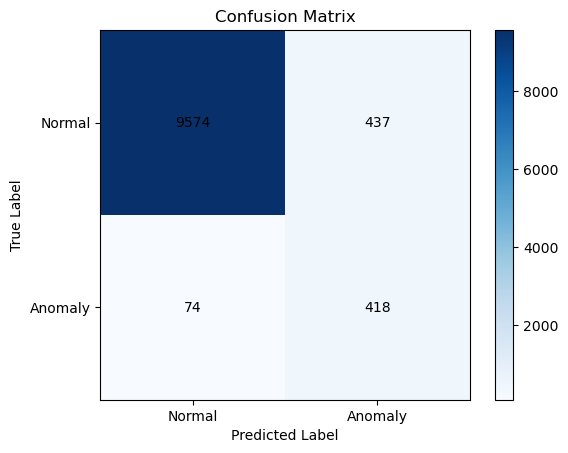

In [191]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add number values in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

# Customize the plot
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Normal', 'Anomaly'],
       yticklabels=['Normal', 'Anomaly'],
       xlabel="Predicted Label",
       ylabel="True Label",
       title="Confusion Matrix")

plt.colorbar(im)
plt.show()

In [192]:
from sklearn.metrics import classification_report
print(classification_report(X_test['Class'],y_label))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10011
           1       0.49      0.85      0.62       492

    accuracy                           0.95     10503
   macro avg       0.74      0.90      0.80     10503
weighted avg       0.97      0.95      0.96     10503



In [5]:
def mo3adala(a,b,c):
    if a==0:
        if b==c:
            print('toute les nombre represente une solution')
        else:
            print("l'esquation n'a pas de solution")
    else:
        print(f'la solution est :{(c-b)/a}')

In [7]:
mo3adala(2,3,1)

la solution est :-1.0
